In [7]:
import numpy as np
import scipy.io
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Validation classification analysis

In [30]:
def load_mat_file(file_path, key):
    # Load the MATLAB file
    data = scipy.io.loadmat(file_path)
    # Assuming the labels or predictions are stored under the key 'labels'
    return data[key].squeeze()

def compute_metrics(true_labels, predicted_labels):
    # Calculate different metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='macro')
    recall = recall_score(true_labels, predicted_labels, average='macro')
    f1 = f1_score(true_labels, predicted_labels, average='macro')
    return accuracy, precision, recall, f1

def plot_confusion_matrix(true_labels, predicted_labels):
    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Normalize the confusion matrix by the number of instances in each class (rows)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create the plot
    fig, ax = plt.subplots()
    cax = ax.matshow(cm_normalized, cmap=plt.cm.Blues)
    
    # Add title and labels
    plt.title('Confusion Matrix (% Correct per Class)')
    fig.colorbar(cax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticks(np.arange(len(np.unique(true_labels))))
    ax.set_yticks(np.arange(len(np.unique(true_labels))))
    ax.set_xticklabels(np.unique(true_labels))
    ax.set_yticklabels(np.unique(true_labels))
    ax.xaxis.set_ticks_position('bottom')

    # Add numbers to each cell
    for (i, j), val in np.ndenumerate(cm_normalized):
        ax.text(j, i, f"{val:.2%}", ha='center', va='center', color='black')

    # Display the plot
    plt.show()

In [20]:
true_labels = load_mat_file("Confusion_Val_Lab.mat", "labels")
predictions = load_mat_file("Confusion_Val.mat", "predictions")

Accuracy: 0.6338028169014085
Precision: 0.5649737490624666
Recall: 0.5607182940516274
F1 Score: 0.5561531493947013


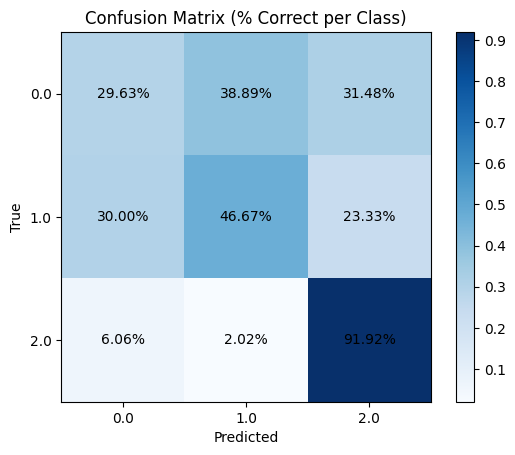

In [31]:
# Compute classification metrics
accuracy, precision, recall, f1 = compute_metrics(true_labels, predictions)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot confusion matrix
plot_confusion_matrix(true_labels, predictions)

# Knock Up and Down

In [33]:
data = scipy.io.loadmat("Knockup.mat")

kup = load_mat_file("Knockup.mat", "Knockup")
kdown = load_mat_file("Knockdown.mat", "Knockdown")

In [34]:
kdown.shape

(2206, 213)